In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl 
import random

$$\frac{\partial{\phi}}{\partial{t}}=D\frac{\partial^2{\phi}}{\partial{x^2}}$$

$$\phi(0,t)=\phi_0$$

\begin{equation}
\phi(x)=
    \begin{cases}
        0 & \text{if } x >0\\
        \phi_0 & \text{if } x \le 0
    \end{cases}
\end{equation}

$$D=\pi, \ t_0=2, \ x_0=\pi$$

In [3]:
tf.keras.backend.set_floatx('float32')

#Define the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(40, activation='tanh'),
    tf.keras.layers.Dense(1)
])

In [4]:
def loss(xt,x0t,x1t):
    
    with tf.GradientTape(persistent=True) as tape:
        x,t=tf.unstack(xt,axis=1)
        tape.watch(x)
        tape.watch(t)
        
        phi=model(tf.stack((x,t),axis=1))
        dphi_dt=tape.gradient(phi,t)
        dphi_dx=tape.gradient(phi,x)
        d2phi_dx2=tape.gradient(dphi_dx,x)
        
        "Equation loss"
        loss1=tf.reduce_mean(tf.square(dphi_dt-D*d2phi_dx2))
        
        "boundary condition loss"
        x0,t=tf.unstack(x0t,axis=1)
        phi0=model(x0t)
        loss2=tf.reduce_mean(tf.square(phi0-n0))
        
        "initial condition loss"
        x1,t1=tf.unstack(x1t,axis=1)
        phi1=model(x1t)
    
        loss3=tf.reduce_mean(tf.square(phi1))
    
    return loss1+loss2+loss3

In [5]:
#constants
D=np.pi
N0=2

In [6]:
N=30000
N2=2000

#Domain 
x=np.pi*np.random.rand(N,1)
t=2*np.random.rand(N,1)

x=np.reshape(x,-1)
t=np.reshape(t,-1)
xt = np.concatenate([x[:, None], t[:, None]], axis=1)
XT=tf.convert_to_tensor(xt, dtype=tf.float32, dtype_hint=None, name=None)

#phi(0,t): Boundary condition
x0=np.zeros((N2,1))
t0=np.random.rand(N2,1)
x0=np.reshape(x0,-1)
t0=np.reshape(t0,-1)
x0t = np.concatenate([x0[:, None], t0[:, None]], axis=1)
X0T=tf.convert_to_tensor(x0t, dtype=tf.float32, dtype_hint=None, name=None)

#phi(x,0): Initial condition at t=0
x1=1e-6+np.pi*np.random.rand(N2,1)
t1=np.zeros((N2,1))
x1=np.reshape(x1,-1)
t1=np.reshape(t1,-1)
x1t = np.concatenate([x1[:, None], t1[:, None]], axis=1)
X1T=tf.convert_to_tensor(x1t, dtype=tf.float32, dtype_hint=None, name=None)

n0=N0*np.ones((N2,1))

In [13]:
# Define the optimizer

optimizer = tf.keras.optimizers.Adam()

# Train the model
for epoch in range(1000):
    with tf.GradientTape() as tape:
        loss_value = loss(XT,X0T,X1T)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss={loss_value:.6f}")

Epoch 0, loss=0.094252
Epoch 100, loss=0.080547
Epoch 200, loss=0.068575
Epoch 300, loss=0.058826
Epoch 400, loss=0.051319
Epoch 500, loss=0.045862
Epoch 600, loss=0.041381
Epoch 700, loss=0.037849
Epoch 800, loss=0.034905
Epoch 900, loss=0.032358


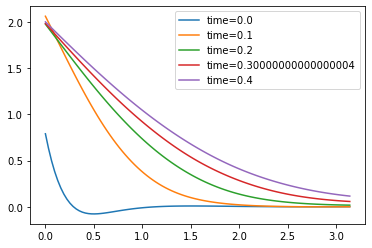

In [14]:
# Define the coordinates of the grid points
x = np.linspace(0,np.pi,100)
nx1=np.reshape(x,-1)
for i in range(5):
    t = (0+i*0.1)*np.ones((100,1))
    ny1=np.reshape(t,-1)
    nxny = np.concatenate([nx1[:, None], ny1[:, None]], axis=1)
    phi=model(nxny)
    plt.plot(x,phi,label=f'time={0+i*0.1}')
    
plt.legend()
plt.show()

In [17]:
N=1000
x=np.linspace(0,np.pi,N)
t=np.linspace(0,2,N)
x_1=np.reshape(x,-1)
t_1=np.reshape(t,-1)

nx, nt = np.meshgrid(x, t, indexing='ij')

nx1=np.reshape(nx,-1)
nt1=np.reshape(nt,-1)

xt = np.concatenate([nx1[:, None], nt1[:, None]], axis=1)
p=model(xt)
p=np.reshape(p,(N,N))

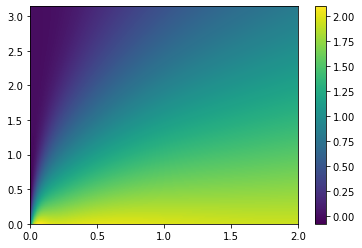

In [20]:
c=plt.pcolormesh(t,x, p) 
plt.colorbar(c)
plt.show()